## Hodgkin-Huxley Model

* $C_M\displaystyle \frac{dV}{dt}=-g_{Na}(V-V_{Na})-g_k(V-V_K)-g_l(V-V_l)+I$ ($V$: Membrane Potential)  
* $\displaystyle \frac{dh}{dt}=\alpha_h{(V)}(1-h)-\beta_h(V)h$ ($h$: Na Inactivation)  
* $\displaystyle \frac{dm}{dt}=\alpha_m{(V)}(1-m)-\beta_m(V)m$ ($m$: Na Activation)  
* $\displaystyle \frac{dn}{dt}=\alpha_n{(V)}(1-n)-\beta_n(V)n$ ($n$: K Activation)  

<IPython.core.display.Javascript object>


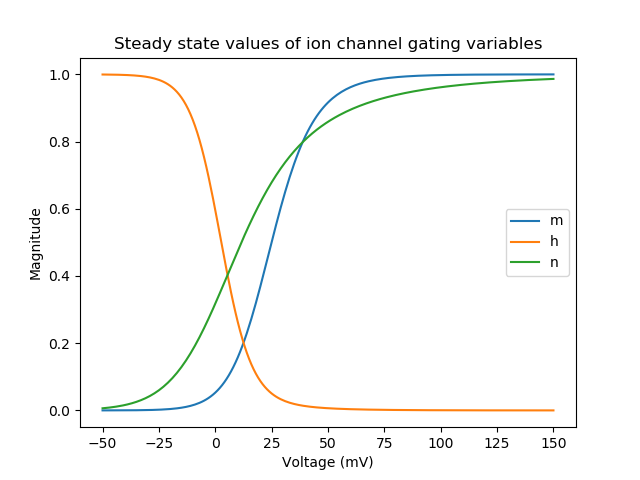

<IPython.core.display.Javascript object>


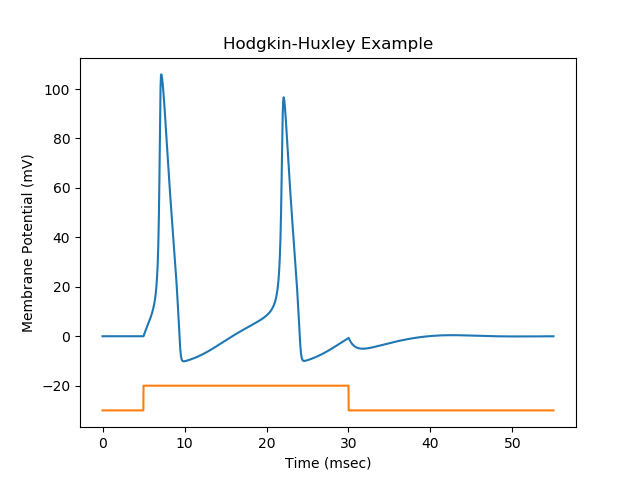

In [3]:
from __future__ import division
from numpy import *
from pylab import *
import matplotlib.pyplot as plt
## Functions
# K channel
alpha_n = vectorize(lambda v: 0.01*(-v + 10)/(exp((-v + 10)/10) - 1) if v != 10 else 0.1)
beta_n  = lambda v: 0.125*exp(-v/80)
n_inf   = lambda v: alpha_n(v)/(alpha_n(v) + beta_n(v))

# Na channel (activating)
alpha_m = vectorize(lambda v: 0.1*(-v + 25)/(exp((-v + 25)/10) - 1) if v != 25 else 1)
beta_m  = lambda v: 4*exp(-v/18)
m_inf   = lambda v: alpha_m(v)/(alpha_m(v) + beta_m(v))

# Na channel (inactivating)
alpha_h = lambda v: 0.07*exp(-v/20)
beta_h  = lambda v: 1/(exp((-v + 30)/10) + 1)
h_inf   = lambda v: alpha_h(v)/(alpha_h(v) + beta_h(v))

### channel activity ###
v = arange(-50,151) # mV
figure()
plot(v, m_inf(v), v, h_inf(v), v, n_inf(v))
legend(('m','h','n'))
title('Steady state values of ion channel gating variables')
ylabel('Magnitude')
xlabel('Voltage (mV)')

## setup parameters and state variables
T     = 55    # ms
dt    = 0.025 # ms
time  = arange(0,T+dt,dt)

## HH Parameters
V_rest  = 0      # mV
Cm      = 1      # uF/cm2
gbar_Na = 120    # mS/cm2
gbar_K  = 36     # mS/cm2
gbar_l  = 0.3    # mS/cm2
E_Na    = 115    # mV
E_K     = -12    # mV
E_l     = 10.613 # mV

Vm      = zeros(len(time)) # mV
Vm[0]   = V_rest
m       = m_inf(V_rest)      
h       = h_inf(V_rest)
n       = n_inf(V_rest)

## Stimulus
I = zeros(len(time))
for i, t in enumerate(time):
  if 5 <= t <= 30: I[i] = 10 # uA/cm2

## Simulate Model
for i in range(1,len(time)):
  g_Na = gbar_Na*(m**3)*h
  g_K  = gbar_K*(n**4)
  g_l  = gbar_l

  m += dt*(alpha_m(Vm[i-1])*(1 - m) - beta_m(Vm[i-1])*m)
  h += dt*(alpha_h(Vm[i-1])*(1 - h) - beta_h(Vm[i-1])*h)
  n += dt*(alpha_n(Vm[i-1])*(1 - n) - beta_n(Vm[i-1])*n)

  Vm[i] = Vm[i-1] + (I[i-1] - g_Na*(Vm[i-1] - E_Na) - g_K*(Vm[i-1] - E_K) - g_l*(Vm[i-1] - E_l)) / Cm * dt 

## plot membrane potential trace
figure()
plot(time, Vm, time, -30+I)
title('Hodgkin-Huxley Example')
ylabel('Membrane Potential (mV)')
xlabel('Time (msec)')

show()


<IPython.core.display.Javascript object>


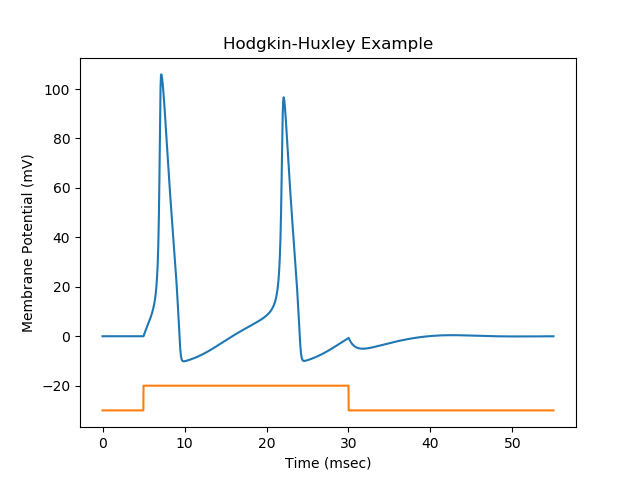

In [2]:
%matplotlib notebook
## plot membrane potential trace
figure()
plot(time, Vm, time, -30+I)
title('Hodgkin-Huxley Example')
ylabel('Membrane Potential (mV)')
xlabel('Time (msec)')

show()